## Imports

In [2]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt

## Full Code

In [3]:
#Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

#Go to the characters in books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

#Click on Accept ('Aceitar' in portuguese)
time.sleep(3) #wait to render all elements
driver.find_element(By.XPATH, '//div[text()="ACEITAR"]').click()

#Find books
book_categories = driver.find_elements(by = By.CLASS_NAME,value = 'category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name':book_name,'url':book_url})

C:\Users\xyux2\AppData\Local\Temp\ipykernel_9812\2405396281.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [4]:
character_list = []

for book in books:
    #go to book page
    driver.get(book['url'])
    character_elems = driver.find_elements(by = By.CLASS_NAME,value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book':book['book_name'],'character':elem.text})

## Checking the head of our df and Number of characters per book

In [6]:
character_df = pd.DataFrame(character_list)
character_df.head()

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs


<AxesSubplot:>

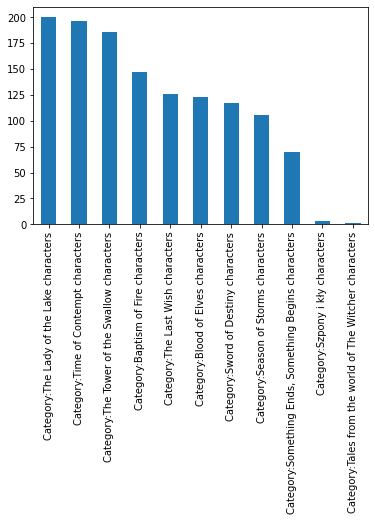

In [7]:
character_df['book'].value_counts().plot(kind="bar")